<a href="https://colab.research.google.com/github/gabedewitt/dio-bootcamps/blob/main/transfer_learning_caes_gatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Transfer Learning em Python 

## Descrição do projeto

O projeto desenvolvido nesse notebook tem como objetivo aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB.  

Foi utilizado como base para este notbook o seguinte projeto que realiza Transfer Learning com o Dataset do MNIST: 
https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 

O dataset utilizado engloba duas classes: gatos e cachorros. Uma descrição da base de dados pode ser visualizada neste link: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs. 

No caso deste notebook o dataset para download pode ser acessado por meio deste link:
https://www.microsoft.com/en-us/download/details.aspx?id=54765. 

### Importando as bibliotecas que serão utilizadas:

In [ ]:
%matplotlib inline

import os

import random
import numpy as np
import keras
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
import seaborn as sns

### Baixando e extraindo as imagens de cães e gatos

In [ ]:
!echo "Baixando imagens de cães e gatos para o desenvolvimento do notebook"
!curl --progress-bar -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!echo "Extraindo imagens de cães e gatos"
!unzip -q kagglecatsanddogs_5340.zip 
!rm kagglecatsanddogs_5340.zip
!ls

Baixando imagens de cães e gatos para o desenvolvimento do notebook
######################################################################## 100.0%
Extraindo imagens de cães e gatos
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 CDLA-Permissive-2.0.pdf   PetImages  'readme[1].txt'   sample_data


In [ ]:
root = 'PetImages'
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories]

print(categories)

['PetImages/Dog', 'PetImages/Cat']


Esta função faz o pré-processamento da imagem e um vetor de input

In [ ]:
# função auxiliar que carrega a imagem e retorna a mesma junto do vetor de input
def get_image(path):
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Carregando 500 imagens de cada

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images[:1000]: #limitando para 1000 imagens por limitação de RAM do Colab
      try:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})
      except:
        print(f'Imagem corrompida {img_path}') 
      

# conta o número de classes
num_classes = len(categories)

Randomizando a ordem dos dados

In [ ]:
random.shuffle(data)

Criando datasets de treino, validação e teste (70%, 15%, 15%, respectivamente)

In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

Separando os dados pelos diferentes conjuntos

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]


Pré-processamento de dados, para garantir q 
Pre-process the data as before by making sure it's float32 and normalized between 0 and 1.

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(300, 2)


Gerando um resumo dos conjuntos até então:

In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 2000 images from 2 categories
train / validation / test split: 1400, 300, 300
training data shape:  (1400, 224, 224, 3)
training labels shape:  (1400, 2)


Observando algumas imagens do dataset

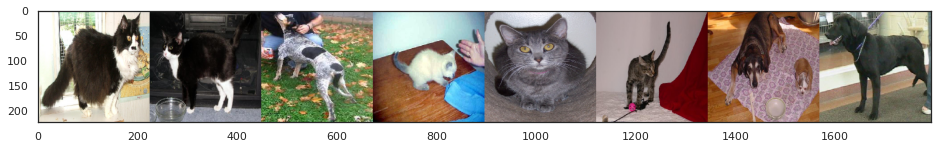

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

### Gerando uma rede neural do zero

Utilizando a mesma criação de rede que no notebook exemplo temos:

In [ ]:
# criando a rede neural
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_13 (Activation)  (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                 

A rede neural possui cerca de 1.2 milhões de parâmetros. A maior parte deles termina numa camada denominada "dense_5".
Em seguida o modelo é treinado por 100 épocas com um tamanho do lote (batch size) de 128, além disso o histórico da performance é salvo para posterior plotagem das perdas ao longo do tempo.

In [ ]:
# compilando o modelo para usar a função de perda 'categorical cross-entropy'
# e o otimizador adadelta
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
11/11 [==============================] - 3s 213ms/step - loss: 0.7393 - accuracy: 0.5079 - val_loss: 0.6884 - val_accuracy: 0.5300
Epoch 2/10
11/11 [==============================] - 2s 182ms/step - loss: 0.6884 - accuracy: 0.5121 - val_loss: 0.6854 - val_accuracy: 0.5433
Epoch 3/10
11/11 [==============================] - 2s 183ms/step - loss: 0.6698 - accuracy: 0.5664 - val_loss: 0.6667 - val_accuracy: 0.5667
Epoch 4/10
11/11 [==============================] - 2s 183ms/step - loss: 0.6487 - accuracy: 0.6157 - val_loss: 0.6694 - val_accuracy: 0.5433
Epoch 5/10
11/11 [==============================] - 2s 183ms/step - loss: 0.6390 - accuracy: 0.6136 - val_loss: 0.6534 - val_accuracy: 0.5700
Epoch 6/10
11/11 [==============================] - 2s 185ms/step - loss: 0.6307 - accuracy: 0.6229 - val_loss: 0.6568 - val_accuracy: 0.5733
Epoch 7/10
11/11 [==============================] - 2s 183ms/step - loss: 0.6289 - accuracy: 0.6264 - val_loss: 0.6428 - val_accuracy: 0.5733
Epoch 

### Plotando a perda e a acurácia para o dataset de validação ao longo do tempo

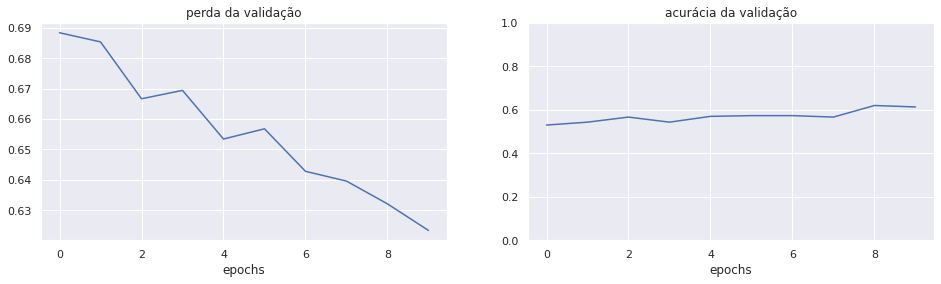

In [ ]:
sns.set_theme()
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("perda da validação")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("acurácia da validação")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

A função de perda para validação tem um vale local por volta de 30 épocas, mas tem um pico acentuado por volta da 50, porém depois há uma queda e a acuráciatem uma leve melhora ficando pouca abaixo de 70%.

Observando a performance do modelo no dataset de test temos:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6321120858192444
Test accuracy: 0.6499999761581421


Temos que a acurácia do modelo iniciado do zero fica em 69% para uma situação de 2000 imagens de cães e gatos, é um resultado surpreendente visto que é uma rede que não foi propriamente treinada ou balanceada; porém buscamos uma melhora com o uso do aprendizado transferido.

## Transfer learning com uma rede já existente

### Carregando a rede VGG16 do keras que foi treinado sobre a ImageNet:

In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Repetindo os passos do notebook de exemplo: 

In [ ]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


### Retreinando o modelo pré-existente para a situação de cães e gatos:

In [ ]:
# fazendo todas as camadas estáticas, congelando os pesos (com exceção da última)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# assegurando que a última camada é capaz de aprender com os dados
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

A rede é idêntica à VGG16 instanciada anteriormente, porém só a última camada com 8194 parâmetros consegue ser modificada (Trainable params: 8,194)

A seguir o treinamento do modelo é realizado com os mesmo parâmetros e registro das métricas em cada época do treinamento:

In [ ]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(x_val, y_val))


Epoch 1/10
11/11 [==============================] - 10s 872ms/step - loss: 0.8204 - accuracy: 0.5221 - val_loss: 0.5503 - val_accuracy: 0.7067
Epoch 2/10
11/11 [==============================] - 9s 832ms/step - loss: 0.5091 - accuracy: 0.7593 - val_loss: 0.4838 - val_accuracy: 0.7533
Epoch 3/10
11/11 [==============================] - 9s 829ms/step - loss: 0.4256 - accuracy: 0.8257 - val_loss: 0.4499 - val_accuracy: 0.7600
Epoch 4/10
11/11 [==============================] - 9s 822ms/step - loss: 0.3642 - accuracy: 0.8571 - val_loss: 0.3716 - val_accuracy: 0.8567
Epoch 5/10
11/11 [==============================] - 9s 824ms/step - loss: 0.3346 - accuracy: 0.8779 - val_loss: 0.3535 - val_accuracy: 0.8567
Epoch 6/10
11/11 [==============================] - 9s 828ms/step - loss: 0.3059 - accuracy: 0.8943 - val_loss: 0.3378 - val_accuracy: 0.8667
Epoch 7/10
11/11 [==============================] - 9s 837ms/step - loss: 0.2863 - accuracy: 0.9079 - val_loss: 0.3361 - val_accuracy: 0.8567
Epoch

A acurácia de validação para a última época é de 88%, uma melhora considerável em relação ao modelo inicial, além disso o treinamento é levemente mais rápido pois o congelamento dos pesos que não da última camada negam a necessidade da retropropagação de erro, diminuindo o tempo de treinamento.

Plotando as métricas da função de perda e acurácia para a validação e comparando com o primeiro modelo temos:

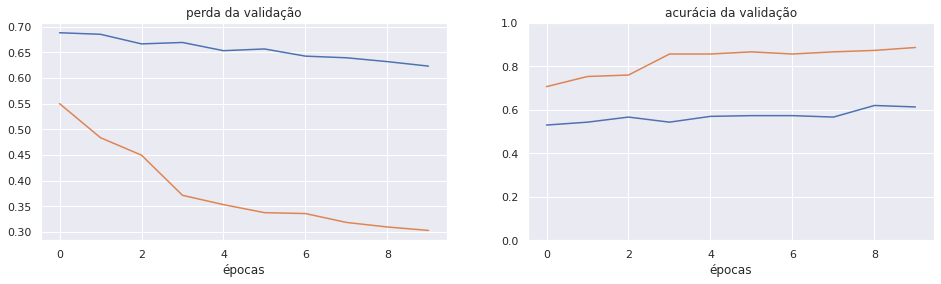

In [138]:
sns.set_theme()
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("perda da validação")
ax.set_xlabel("épocas")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("acurácia da validação")
ax2.set_xlabel("épocas")
ax2.set_ylim(0, 1)

plt.show()

Observando ambos os gráficos nota-se a melhora do modelo com transfer learning, ao passo tanto a perda quando a acurácia superam o criado do zero.

Observando para o conjunto de teste, temos que as métricas do novo modelo são:

In [139]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.2991914749145508
Test accuracy: 0.8899999856948853


Para utilizar o modelo, execute o código a seguir para gerar uma lista com todas as imagens, 12500 de cada classe e escolha duas para teste

In [140]:
categories

['PetImages/Dog', 'PetImages/Cat']

In [141]:
all_images = []

dog_images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(categories[0]) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]

cat_images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(categories[1]) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]        

all_images.extend(dog_images)
all_images.extend(cat_images)

In [142]:
len(all_images)

25000

In [143]:
# Escolhendo fotos fora das 1000 primeiras imagens de cães
random_dog = random.randrange(1001, 12500, 1)
print(random_dog)

6614


In [144]:
# Escolhendo fotos fora das 1000 primeiras imagens de gatos
random_cat = random.randrange(13501, 25000, 1)
print(random_cat)

16223


In [145]:
all_images[random_dog]

'PetImages/Dog/2941.jpg'

In [146]:
all_images[random_cat]

'PetImages/Cat/8618.jpg'

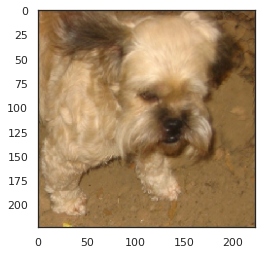

In [147]:
test_dog, x_dog = get_image(all_images[random_dog])
sns.set_theme(style = 'white')
test_image = np.asarray(test_dog)
plt.imshow(test_dog)

In [148]:
probabilities = model_new.predict([x_dog])
print(f'Probabilidade de ser cão: {probabilities[0][0]}')
print(f'Probabilidade de ser gato: {probabilities[0][1]}')

1/1 [==============================] - 0s 18ms/step
Probabilidade de ser cão: 0.9999996423721313
Probabilidade de ser gato: 4.0907315224103513e-07


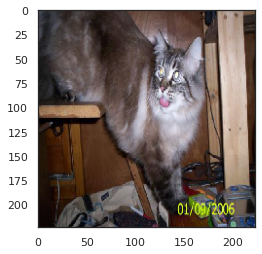

In [149]:
test_cat, x_cat = get_image(all_images[random_cat])
test_image = np.asarray(test_cat)
plt.imshow(test_image)

In [150]:
probabilities = model_new.predict([x_cat])
print(f'Probabilidade de ser cão: {probabilities[0][0]}')
print(f'Probabilidade de ser gato: {probabilities[0][1]}')

1/1 [==============================] - 0s 17ms/step
Probabilidade de ser cão: 8.300542475581096e-09
Probabilidade de ser gato: 1.0


### Observações finais e propostas de melhoria

Os resultados do treinamento com transfer learning são impressionantes, porém há de se perguntar como o modelo se sairia com fotos não tão bem tratadas ou com frames de um vídeo, já que a possibilidade de soluções de visão computacional voltadas para vídeo vem ganhando espaço no mercado.

Além disso, como a proposta do desafio era a aplicação do transfer learning não se utilizou propragação de erro para a rede derivada, existe a possibilidade de melhora de resultados com a realização desses passos bem com a utilização de mais fotos para treinamento; foram usadas 2000 das quase 25000 disponíveis.